In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import fbprophet


In [8]:
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [2]:
import pandas as pd
data = pd.read_csv("temperature-quotidienne-regionale.csv", sep=";")


In [3]:
#data = data[(data.Date.between('2016-01-01','2019-12-31'))&(data.Région.str.contains('Occitanie'))]
#dat = df[(df.Date.between('2016-03-10','2019-12-31'))&(df['Région']=='Ile-de-France')]

In [4]:
data.tail(16)

,Date,Code INSEE région,Région,TMin (°C),TMax (°C),TMoy (°C)
19562,2020-02-20,32,Hauts-de-France,6.00,11.66,8.83
19563,2020-02-21,27,Bourgogne-Franche-Comté,0.43,10.60,5.52
19564,2020-02-21,28,Normandie,1.40,10.44,5.92
19565,2020-02-22,28,Normandie,4.20,11.68,7.94
19566,2020-02-22,76,Occitanie,1.18,17.15,9.17
19567,2020-02-23,93,Provence-Alpes-Côte d'Azur,3.78,18.97,11.38
19568,2020-02-24,44,Grand-Est,7.69,14.92,11.31
19569,2020-02-25,53,Bretagne,5.75,11.52,8.64
19570,2020-02-25,24,Centre-Val de Loire,7.13,11.72,9.42
19571,2020-02-27,52,Pays de la Loire,5.05,13.25,9.15


In [5]:
df =data[(data['Région'] == 'Occitanie')&(data.Date.between('2016-03-09', '2019-31-12'))]

In [6]:
df.head()

,Date,Code INSEE région,Région,TMin (°C),TMax (°C),TMoy (°C)
5,2016-03-16,76,Occitanie,5.11,8.59,6.85
9,2016-03-25,76,Occitanie,5.42,12.99,9.20
56,2016-11-20,76,Occitanie,6.13,17.85,11.99
65,2016-11-30,76,Occitanie,3.64,14.15,8.89
67,2016-12-01,76,Occitanie,0.03,13.89,6.96


In [7]:
df= df.drop(['Code INSEE région','TMin (°C)','TMax (°C)'], axis=1, inplace =True)

/Users/lasirene/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
df

In [9]:
df.rename(columns={'Date':'ds', 'TMoy (°C)':'y'},inplace=True)

AttributeError: 'NoneType' object has no attribute 'rename'

In [13]:
df

In [11]:
df.drop('Région', axis=1, inplace=True)

AttributeError: 'NoneType' object has no attribute 'drop'

In [12]:
df.tail()

AttributeError: 'NoneType' object has no attribute 'tail'

In [47]:
df = df[1:]

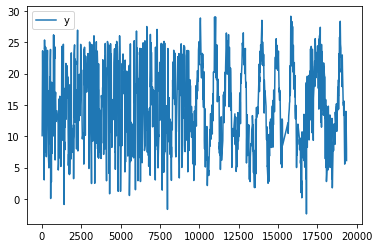

In [48]:
df.plot()

In [49]:
df['y'] = df['y'] - df['y'].shift(1)

/Users/khadim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


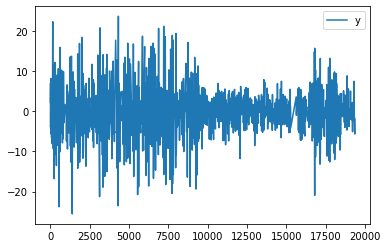

In [50]:
df.plot()

In [51]:
from fbprophet import Prophet

In [52]:
model = Prophet()

In [53]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:
df.shape

(1378, 2)

In [70]:
future_dates = model.make_future_dataframe(periods=365)

In [71]:
future_dates.shape

(1743, 1)

In [72]:
future_dates.head()

,ds
0,2016-03-10
1,2016-03-11
2,2016-03-12
3,2016-03-13
4,2016-03-14


In [73]:
prediction = model.predict(future_dates)

In [76]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1738,2020-12-25,-0.076702,-9.667347,4.091179,-0.096177,-0.057406,-2.757365,-2.757365,-2.757365,0.040891,0.040891,0.040891,-2.798256,-2.798256,-2.798256,0.0,0.0,0.0,-2.834067
1739,2020-12-26,-0.076665,-9.328345,4.355002,-0.096263,-0.057315,-2.657565,-2.657565,-2.657565,0.269260,0.269260,0.269260,-2.926825,-2.926825,-2.926825,0.0,0.0,0.0,-2.734229
1740,2020-12-27,-0.076627,-10.243423,4.429871,-0.096376,-0.057216,-3.021204,-3.021204,-3.021204,0.043201,0.043201,0.043201,-3.064405,-3.064405,-3.064405,0.0,0.0,0.0,-3.097831
1741,2020-12-28,-0.076590,-10.331962,3.896608,-0.096476,-0.057121,-3.378577,-3.378577,-3.378577,-0.169823,-0.169823,-0.169823,-3.208754,-3.208754,-3.208754,0.0,0.0,0.0,-3.455167
1742,2020-12-29,-0.076552,-10.997497,3.415508,-0.096535,-0.057025,-3.555728,-3.555728,-3.555728,-0.198379,-0.198379,-0.198379,-3.357350,-3.357350,-3.357350,0.0,0.0,0.0,-3.632280


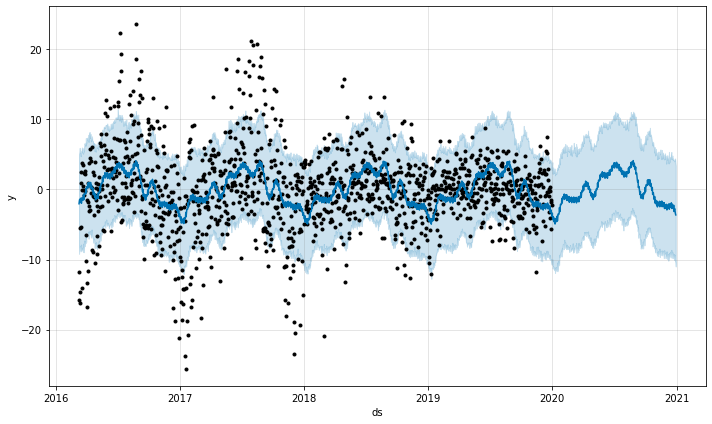

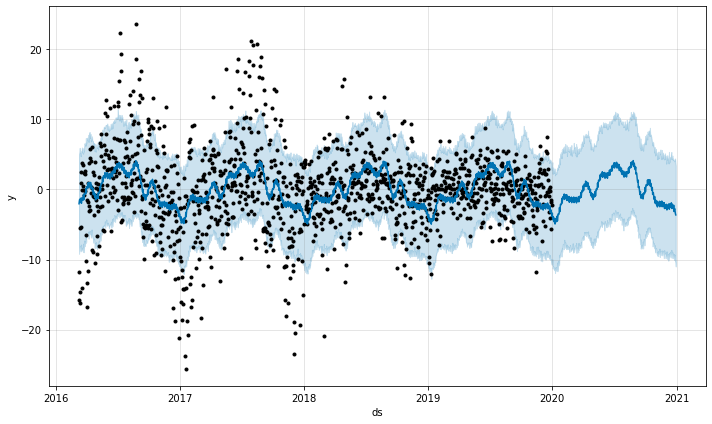

In [75]:
# Plot Our Predictions
model.plot(prediction)

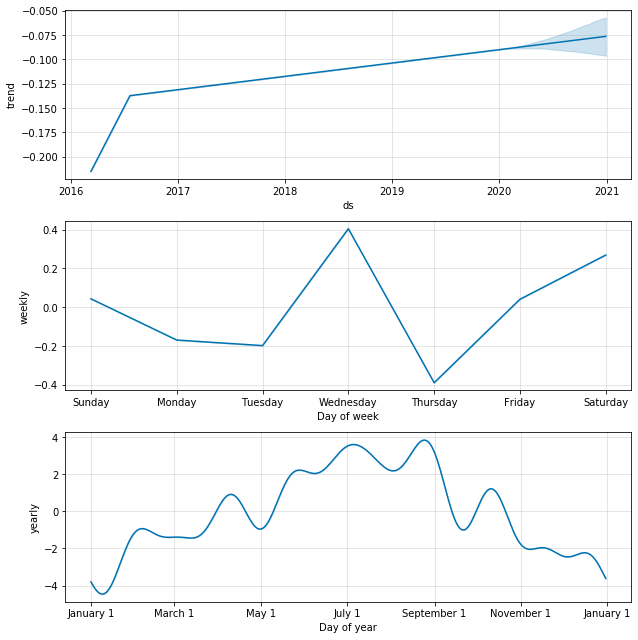

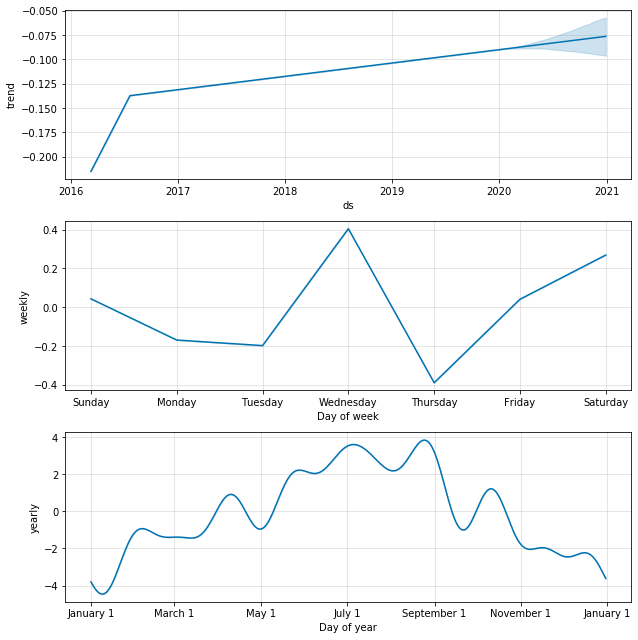

In [77]:
# Visualize Each Component [Trends,Weekly]
model.plot_components(prediction)

In [79]:
from fbprophet.diagnostics import cross_validation

In [80]:
df.shape

(1378, 2)

In [82]:
cv =cross_validation(model,initial = '35 days', period = '180 days', horizon='365 days')

INFO:fbprophet:Making 6 forecasts with cutoffs between 2016-07-13 00:00:00 and 2018-12-30 00:00:00


In [84]:
cv.shape

(2169, 6)

In [85]:
from fbprophet.diagnostics import performance_metrics

In [86]:
df_perfor= performance_metrics(cv)

INFO:fbprophet:Skipping MAPE because y close to 0


In [87]:
df_perfor

,horizon,mse,rmse,mae,mdape,coverage
0,37 days,46.505321,6.819481,5.551226,1.913214,0.743827
1,38 days,47.574554,6.897431,5.623231,1.781678,0.739198
2,39 days,45.880576,6.773520,5.511078,1.639891,0.743827
3,40 days,44.800822,6.693342,5.421777,1.639891,0.753086
4,41 days,44.457533,6.667648,5.404592,1.781678,0.744599
...,...,...,...,...,...,...
324,361 days,269.016696,16.401728,10.022885,2.373413,0.708333
325,362 days,271.529866,16.478163,10.071744,2.380653,0.703704
326,363 days,271.335547,16.472266,10.079175,2.380653,0.695988
327,364 days,266.088110,16.312207,10.000208,2.380653,0.692901


In [88]:
from fbprophet.plot import plot_cross_validation_metric

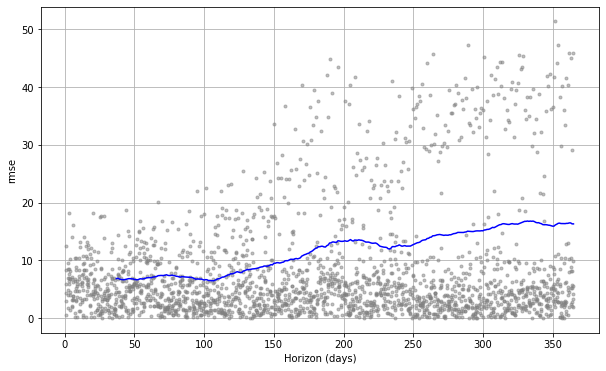

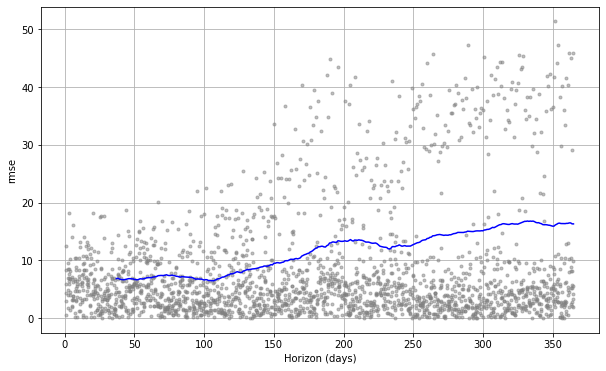

In [90]:
plot_cross_validation_metric(cv, metric='rmse')